In [142]:
import gym
import chemo_simulation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [196]:
env = gym.make('ChemoSimulation-v0')

In [197]:
# Create patient: initial Tumor size and wellness
starting_state = np.array([1.5]),np.array([0.5])

### Recreate `Fig. 6` of Fuernkranz et al. (2012) paper

In [198]:
# Dosages to provide to patient
dosage_levels = np.array([1. ,.7 , .1, .7, 1., .7])

In [199]:
# Simulate the environment
env.reset(init_state = starting_state)

obs_list = []
obs_list.append(starting_state)

for dosage in dosage_levels:
    obs, reward, done, p_death = env.step(np.array([dosage]))
    obs_list.append(obs)
    if done:
        break

In [200]:
# Data for the plot
tumor_s = [t_size[0] for t_size, wellness in obs_list]
welness = [wellness[0] for t_size, wellness in obs_list]
dosage_levels = np.insert(dosage_levels, 0, -1)

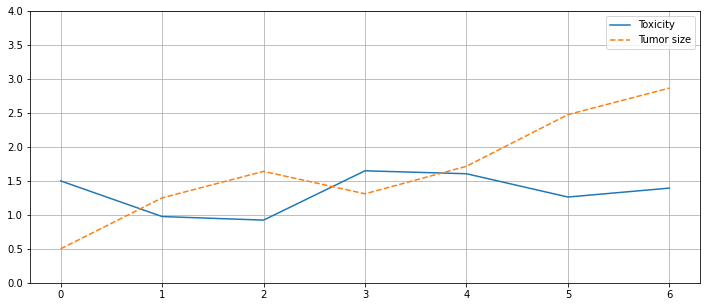

In [203]:
# Create the plot
fig, ax = plt.subplots(figsize = (12,5))

sns.lineplot(x = np.arange(0,len(dosage_levels))
             , y = tumor_s
             , ax = ax)
sns.lineplot(x = np.arange(0,len(dosage_levels))
            , y = welness
            , ax = ax)

ax.lines[1].set_linestyle("--")
ax.legend(['Toxicity', 'Tumor size'])
ax.set(ylim=(0, 4))
plt.grid()
plt.show()


### Recreate `Fig. 7` of Fuernkranz et al. (2012) paper